 Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset.
a. Perform Data Pre-processing 
b. Define Model and perform training 
c. Evaluate Results using confusion matrix. 

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9065 - loss: 0.3111 - val_accuracy: 0.9860 - val_loss: 0.0419
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9844 - loss: 0.0515 - val_accuracy: 0.9875 - val_loss: 0.0362
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9902 - loss: 0.0303 - val_accuracy: 0.9881 - val_loss: 0.0351
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Confusion Matrix:
[[ 974    0    2    0    0    0    1    2    1    0]
 [   0 1132    0    0    0    0    0    3    0    0]
 [   0    2 1015    3    2    0    0   10    0    0]
 [   0    0    1 1002    0    1    0    5    1    0]
 [   0    0    0    0  970    0    0    5    0    7]
 [   0    0    0    7    0  881    1    2    0    1]
 [   4    3    0    1    3   13  932    0    2    0]
 [   0    0    3    0    0    0    0 1025    0    0]
 [   0    1    1    3    1    2    0    4  959    3]
 [   0    0    0    1    3    2    0   10    2  991]]


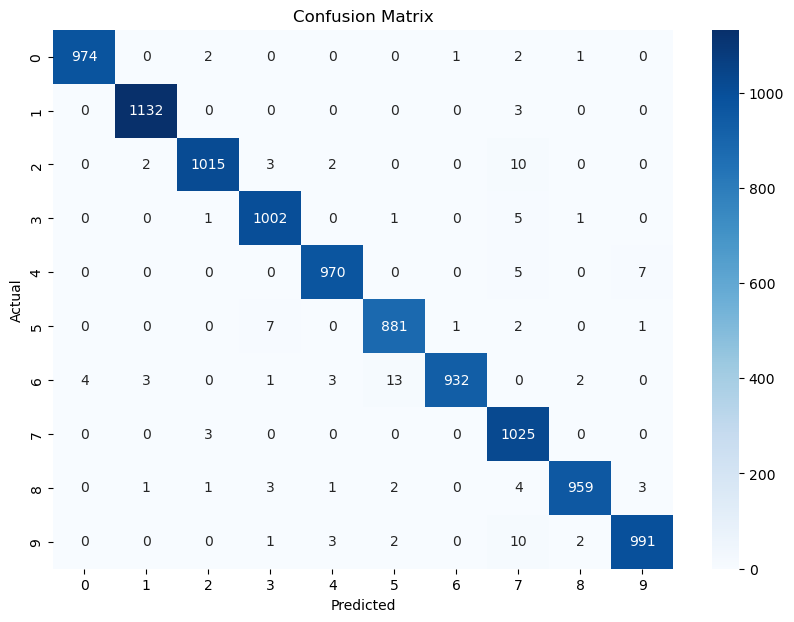

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.99       958
           7       0.96      1.00      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [7]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# a. Data Pre-processing
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data (scale pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to add channel dimension (needed for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# b. Define Model and perform training
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for MNIST
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# c. Evaluate Results using confusion matrix
# Predict the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes))
